# Normalization:

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer

# L2 Normalization: Apply text data
Rescales each sample (row) to have unit norm. This type of normalization is often used when dealing with text data. L2 norm is calculated as the square root of the sum of the squared vectors values.

In [3]:
data= [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer= Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


# L2 Normalization:
 Also rescales each sample (row) but with a different approach, ensuring the sum of the absolute vales is 1 in each row. The L1 norm is calculated as the sum of the absolute vectors values. Examples:

In [4]:
from sklearn.preprocessing import Normalizer
data= [[1, 1, 1],[1, 1, 0], [1, 0, 0]]
normalizer= Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


# Log Transformation:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data= {'values':[1, 10, 100, 500, 1000, 2000, 3000, 4000, 50000, 70000, 80000, 90000, 100000]}
df= pd.DataFrame(data)

In [7]:
df['log_values']= np.log(df['values'])
df

,values,log_values
0,1,0.000000
1,10,2.302585
2,100,4.605170
3,500,6.214608
4,1000,6.907755
5,2000,7.600902
6,3000,8.006368
7,4000,8.294050
8,50000,10.819778
9,70000,11.156251


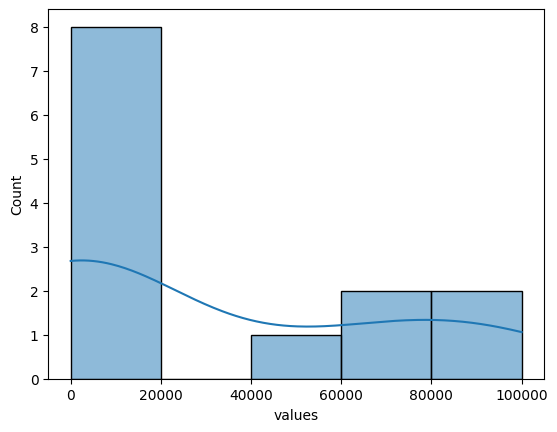

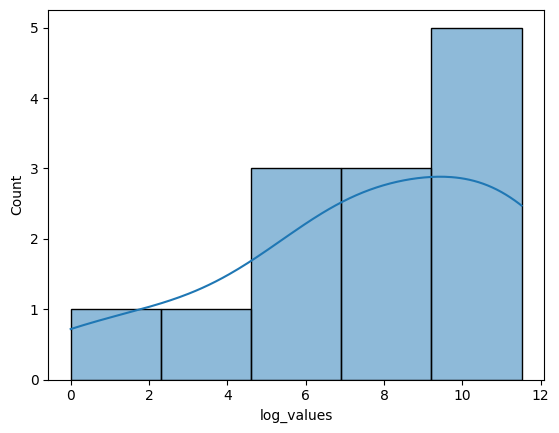

In [8]:
for col in df.columns:
    sns.histplot(df[col], kde= True)
    plt.show()

# Feature Encoding:

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [12]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [13]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Use the LabelEncoder:

In [15]:
label= LabelEncoder()
df['encoded_time']=label.fit_transform(df['time'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_time
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [16]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [17]:
df['encoded_time'].value_counts()

encoded_time
0    176
1     68
Name: count, dtype: int64

# Use the OrdinalEncoder:

In [18]:
label= LabelEncoder()
df['encoded_time']=label.fit_transform(df['time'])
df.head()


,total_bill,tip,sex,smoker,day,time,size,encoded_time
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [19]:
ordinal= OrdinalEncoder(categories=[['Thur', 'Fri', 'Sat', 'Sun']])
df['ordinal_encoder']= ordinal.fit_transform(df[['day']])
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_time,ordinal_encoder
0,16.99,1.01,Female,No,Sun,Dinner,2,0,3.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,3.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,3.0


In [20]:
df['ordinal_encoder'].value_counts()

ordinal_encoder
2.0    87
3.0    76
0.0    62
1.0    19
Name: count, dtype: int64

# Apply OneHotEncoder:

In [21]:
ohe= OneHotEncoder()
ohe.fit_transform(df[['sex']]).toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [22]:
data_set= sns.load_dataset('titanic')
data_set.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
# Assuming data_set is already defined, and has a column 'embarked'
onehot_encoder = OneHotEncoder()
embered_onehot= onehot_encoder.fit_transform(data_set[['embarked']])

# Create DataFrame with correct columns
embered_onehot_df= pd.DataFrame(embered_onehot.toarray(), columns=onehot_encoder.get_feature_names_out())

# Concatenate the new DataFrame with the original one
data_set= pd.concat([data_set.reset_index(drop=True), embered_onehot_df.reset_index(drop=True)], axis=1)

In [24]:
data_set.head().T

,0,1,2,3,4
survived,0,1,1,1,0
pclass,3,1,3,1,3
sex,male,female,female,female,male
age,22.0,38.0,26.0,35.0,35.0
sibsp,1,1,0,1,0
parch,0,0,0,0,0
fare,7.25,71.2833,7.925,53.1,8.05
embarked,S,C,S,S,S
class,Third,First,Third,First,Third
who,man,woman,woman,woman,man


# BinaryEncoding data:

In [29]:
from category_encoders import BinaryEncoder

binery_encoder= BinaryEncoder()

df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
df_binary= binery_encoder.fit_transform(df['day'])
df_binary

,day_0,day_1,day_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
239,0,1,0
240,0,1,0
241,0,1,0
242,0,1,0


In [31]:
pd.get_dummies(df['day'])

,Thur,Fri,Sat,Sun
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
239,False,False,True,False
240,False,False,True,False
241,False,False,True,False
242,False,False,True,False


In [32]:
# use pandas get dummies :
get_dummies= pd.get_dummies(df, columns=['day'])
get_dummies.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,False,False,False,True
1,10.34,1.66,Male,No,Dinner,3,False,False,False,True
2,21.01,3.50,Male,No,Dinner,3,False,False,False,True
3,23.68,3.31,Male,No,Dinner,2,False,False,False,True
4,24.59,3.61,Female,No,Dinner,4,False,False,False,True


# Data Discretization:
is a preprocessing technique used to transform coontinous or numerical data into discrete categories or bins. This process can be particularly useful for machine learning algoritms that handle categorical data more efficiently than continuous data. It can also help to improve model interpretability and handle outliers more robustly.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

In [34]:
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [37]:
df['age']= df['age'].fillna(df['age'].mean())

In [ ]:
# age discretization
age_dis= KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans') #strategy cannot must
df['age_bin']= age_dis.fit_transform(df[['age']])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.0


<Axes: xlabel='age', ylabel='Count'>

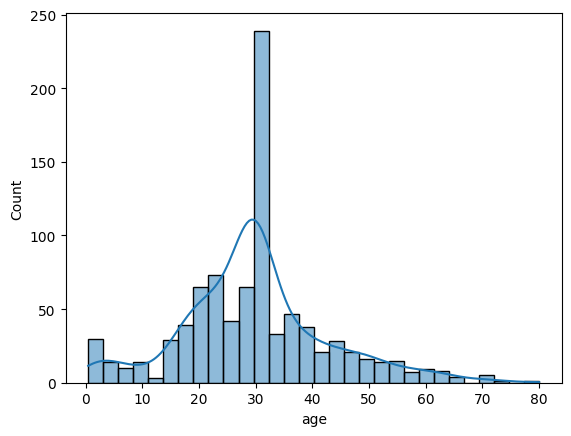

In [42]:
sns.histplot(df['age'], kde=True)

<Axes: xlabel='age', ylabel='Count'>

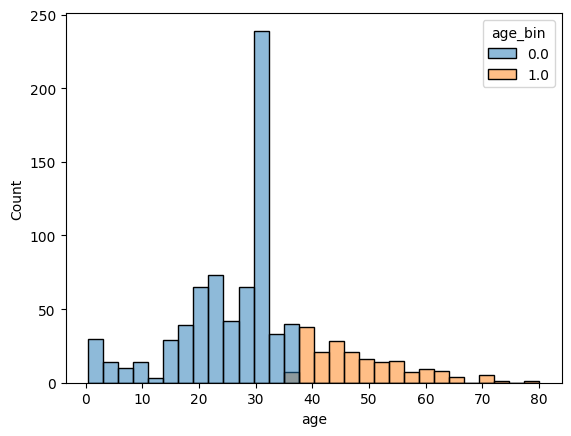

In [53]:
sns.histplot(df, x='age', hue='age_bin')

<Axes: xlabel='age', ylabel='Count'>

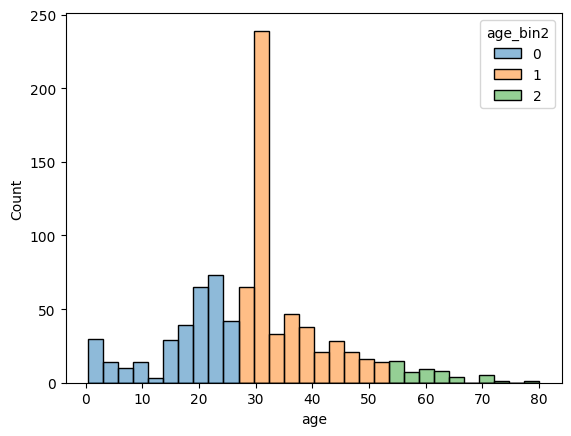

In [54]:
# pandas method for manual binning
df['age_bin2']= pd.cut(df['age'], bins=3, labels=[0,1,2])
sns.histplot(df, x='age', hue='age_bin2')

<Axes: xlabel='age', ylabel='Count'>

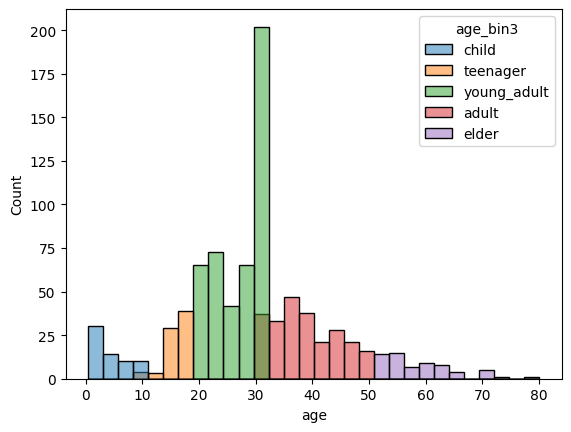

In [55]:
# define the binning
bins= [0, 10, 18, 30, 50, 80]
labels= ['child', 'teenager', 'young_adult', 'adult', 'elder']
df['age_bin3']= pd.cut(df['age'], bins=bins, labels=labels)
sns.histplot(df, x='age', hue='age_bin3')